In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv(mouse_drug_data_to_load)
clinical_trial = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
data_complete = pd.merge(clinical_trial, mouse_drug, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
data_complete.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor = data_complete.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]
# Convert to DataFrame
tumor_mean_df = pd.DataFrame(tumor)
# Preview DataFrame
tumor_mean_df =tumor_mean_df.reset_index()
tumor_mean_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumorA = data_complete.groupby(["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"]
# Convert to DataFrame
tumor_err_df = pd.DataFrame(tumorA)
# Preview DataFrame
tumor_err_df =tumor_err_df.reset_index()
tumor_err_df.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_mean_df =tumor_mean_df.reset_index()
tumor_mean_df = tumor_mean_df.pivot(index = "Timepoint",columns ="Drug")["Tumor Volume (mm3)"]
# Preview that Reformatting worked
tumor_mean_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# Minor Data Munging to Re-Format the Data Frames
tumor_err_df =tumor_err_df.reset_index()
tumor_err_df = tumor_err_df.pivot(index = "Timepoint",columns ="Drug")["Tumor Volume (mm3)"]
# Preview that Reformatting worked
tumor_err_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [6]:
drug = pd.DataFrame(tumor_mean_df, columns = ['Capomulin', 'Infubinol','Ketapril','Placebo' ]) 
drug1 = pd.DataFrame(tumor_err_df, columns = ['Capomulin', 'Infubinol','Ketapril','Placebo' ]) 

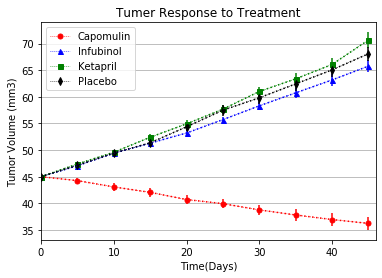

In [7]:
# Generate the Plot (with Error Bars)
ax = drug.plot(figsize=(6,4), color=["red","blue","green","black"], linestyle=':', yerr = drug1, legend = False)
ax.set_prop_cycle('color', ["red","blue" , "green" , "black" ])
drug.plot(figsize=(6,4), style=['o-', '^-', 's-.', 'd--'],markersize=5,linestyle=':',linewidth=0.75 , ax=ax)
# Set a Title and labels
ax.set_xlim(0, 46)
plt.title("Tumer Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(b=None, which='major', axis='y')
# Save the Figure
plt.savefig("../Images/Tumer Response to Treatment.png")
plt.show()

In [8]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Sites = data_complete.groupby(["Drug","Timepoint"]).mean()["Metastatic Sites"]
# Convert to DataFrame
Sites_mean_df = pd.DataFrame(Sites)
# Preview DataFrame
Sites_mean_df =Sites_mean_df.reset_index()
Sites_mean_df.head()



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
SitesA = data_complete.groupby(["Drug","Timepoint"]).sem()["Metastatic Sites"]
# Convert to DataFrame
Sites_err_df = pd.DataFrame(SitesA)
# Preview DataFrame
Sites_err_df =Sites_err_df.reset_index()
Sites_err_df.head()



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [11]:
# Minor Data Munging to Re-Format the Data Frames
Sites_mean_df =Sites_mean_df.reset_index()
Sites_mean_df = Sites_mean_df.pivot(index = "Timepoint",columns ="Drug")["Metastatic Sites"]
# Preview that Reformatting worked
Sites_mean_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [12]:
# Minor Data Munging to Re-Format the Data Frames
Sites_err_df =Sites_err_df.reset_index()
Sites_err_df = Sites_err_df.pivot(index = "Timepoint",columns ="Drug")["Metastatic Sites"]
# Preview that Reformatting worked
Sites_err_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [13]:
drug2 = pd.DataFrame(Sites_mean_df, columns = ['Capomulin', 'Infubinol','Ketapril','Placebo' ]) 
drug3 = pd.DataFrame(Sites_err_df, columns = ['Capomulin', 'Infubinol','Ketapril','Placebo' ]) 


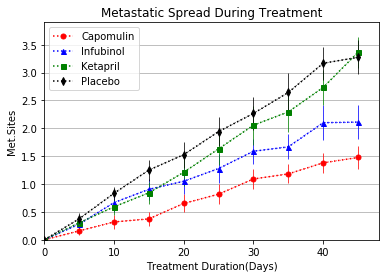

In [14]:
# Generate the Plot (with Error Bars)
ax=drug2.plot(figsize=(6,4), color=["red","blue","green","black"], linestyle=':',
              yerr=drug3,linewidth=0.75, legend = False)
ax.set_prop_cycle('color', ["red","blue" , "green" , "black" ])
drug2.plot( style=['o-', '^-', 's-.', 'd--'], markersize=5,  linestyle=':', ax = ax)
# Set a Title and labels
ax.set_xlim(0, 48)
ax.set_ylim(0, 3.9)
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration(Days)")
plt.ylabel("Met.Sites")
plt.grid(which='major', axis='y')
# Save the Figure
plt.savefig("../Images/Spread during Treatment.png")
plt.show()

In [15]:
# Show the Figure
plt.show()

## Survival Rates

In [16]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Mice = data_complete.groupby(["Drug","Timepoint"]).count()["Mouse ID"]
# Convert to DataFrame
Mice_df = pd.DataFrame(Mice)
# Preview DataFrame
Mice_df =Mice_df.reset_index()
Mice_df.head()



,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [17]:
Mice_df =Mice_df.reset_index()
Mice_df = Mice_df.pivot(index = "Timepoint",columns ="Drug")["Mouse ID"]
Mice_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


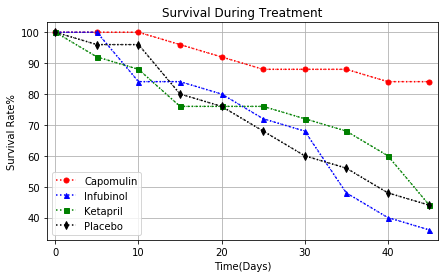

In [18]:
drug5 = pd.DataFrame(Mice_df, columns = ['Capomulin', 'Infubinol','Ketapril','Placebo' ]) 
drug10 = (drug5/25)*100
ax=drug10.plot(figsize=(7,4), color=["red","blue","green","black"], linestyle=':',
              linewidth=1,legend = False)
ax.set_prop_cycle('color', ["red","blue" , "green" , "black" ])
drug10.plot(figsize=(7,4), style=['o-', '^-', 's-.', 'd--'], markersize=5, linestyle=':', ax = ax)
#ax.set_ylim(np.linspace(0,100,len(drug5[0]))
ax.set_xlim(-1, 46)
plt.title("Survival During Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate%")
plt.grid()
plt.savefig("../Images/Survival During Treatment.png")
plt.show()


In [19]:
# Show the Figure
plt.show()

## Summary Bar Graph

In [20]:
# Calculate the percent changes for each drug
tumor_percent1 = data_complete.loc[data_complete["Timepoint"] == 45]
# Display the data to confirm
tumor_percent = tumor_percent1.groupby(["Drug"]).mean()["Tumor Volume (mm3)"]
tumor_percent.head()
tumor_percent_df = (((tumor_percent/45)-1)*100)
tumor_percent_df

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: Tumor Volume (mm3), dtype: float64

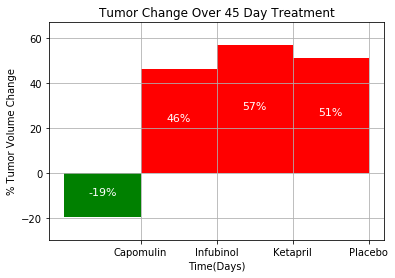

In [21]:
# Store all Relevant Percent Changes into a Tuple
Percent_Changes = [('Capomulin',-19.475303), ('Infubinol', 46.123472),  ('Ketapril', 57.028795), 
                   ('Placebo', 51.297960) ] 

Drug_Tuple = [('Capomulin'), ('Infubinol'),  ('Ketapril'), 
                   ('Placebo') ] 
# Splice the data between passing and failing drugs
Percent= [-19.475303 , 46.123472, 57.028795,51.297960]
plt.bar(Drug_Tuple ,Percent ,width=-1, align="edge" , color=['green','red','red','red'])
plt.ylim(min(Percent)-10, max(Percent)+10)
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("% Tumor Volume Change")
plt.grid()
#def autolabel(Percent):
    #Attach a text label above each bar in *rects*, displaying its height."""
   # for rect in Percent:
        #height = rect.get_height()
        #if height <0 :
            #height1 =-10
       # else:
           # height1 =1
       # ax.annotate('{}%'.format(height),
                   # xy=(rect.get_x() + rect.get_width() / 2, height1),
                  #  xytext=(0, 3),  # 3 points vertical offset
                   # textcoords="offset points",color='white',
                  #  ha='center', va='bottom')
#autolabel((Percent)
#plt.text(x=2.3 , y=5 , s='51%', size=11 , color='white')
#plt.text(x=1.45 , y=5 , s='57%', size=11 , color='white')
#plt.text(x=-0.60 , y=-6 , s='-19%', size=11 , color='white')
for i, v in enumerate(Percent):
       plt.text(i-0.5 , v/2  , str(round(float(v))) + '%' , color='white' ,size=11 , horizontalalignment="center" ) 
plt.savefig("../Images/Tumor Change Over 45 Day Treatment.png")
plt.show()
          

In [22]:
# 3 observations about the results of the study :
#1.Positive reduction of tumor response over a 45 day treatment are drugs Capomulin and Ramicane.
#2.Maximum survival rate of mice is trial for drug Capomulin.
#3.Metastatic Spread during treatment is having maximum trend with the trial of drug Placebo.

